In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [158]:
nanobody_ds = pd.read_csv("/Users/aikium_intern/Desktop/aikium_thermal_stability/NbThermo_Cleaned.csv")
meltome_ds = pd.read_csv("/Users/aikium_intern/Desktop/aikium_thermal_stability/meltome.csv")

In [159]:
meltome_ds["From"] = "meltome"
nanobody_ds["From"] = "nano"
display(nanobody_ds)
display(meltome_ds)

,Tm,Sequence,From
0,67.5,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,nano
1,65.0,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,nano
2,62.0,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,nano
3,62.0,EVQLQASGGGLVQAGGSLRLSCAASGRTDSTQHMAWFRQAPGKERE...,nano
4,70.0,DVQLQASGGGLVQAGGSLRLSCAASARTFYTMGWFRQVLGKDREFV...,nano
...,...,...,...
509,58.0,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano
510,60.0,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano
511,71.0,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKELE...,nano
512,71.0,QVQLVESGGGLVQAGDSLRLSCAASGRTFSDYAMGWFRQAPGKELE...,nano


,meltPoint,Sequence,From
0,56.693844,MQVLAKENIKLNQTVSSKEEAIKLAGQTLIDNGYVTEDYISKMFER...,meltome
1,43.373369,MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVM...,meltome
2,40.693719,MADYFLTVFDPSGNTLVNEQFEAEHEEAAKTHGEALLKEKELHSHT...,meltome
3,48.069618,MRPEEITEMIEQLRTGAINELRVQKEHFLDFRAVLSKQDDFKHFRG...,meltome
4,39.507236,MEEKYETNGYDTSIVYDYKEYPDVKYGRCDNCDYTLFKSSVKSGIF...,meltome
...,...,...,...
326985,45.057271,MASIYLVRHGQAGFNKLDYDQLSDLGHQQGELIGQSLLARSIEAGL...,meltome
326986,40.407357,MPNTAPSTNDNPLLQPITANALPLFSRIKAEHAQPAMEQLLNNNRQ...,meltome
326987,30.038882,MNTEALQQLIQKSVAEEQQTGQLHQLLQQRLETVERIVQLPEVEAL...,meltome
326988,40.143480,MPLTRKEAVITTKVLSEALPYLQKFSGKTIVIKYGGNAMTDETLKN...,meltome


In [160]:
meltome_ds = meltome_ds.rename(columns={"meltPoint": "Tm"})
meltome_ds


,Tm,Sequence,From
0,56.693844,MQVLAKENIKLNQTVSSKEEAIKLAGQTLIDNGYVTEDYISKMFER...,meltome
1,43.373369,MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVM...,meltome
2,40.693719,MADYFLTVFDPSGNTLVNEQFEAEHEEAAKTHGEALLKEKELHSHT...,meltome
3,48.069618,MRPEEITEMIEQLRTGAINELRVQKEHFLDFRAVLSKQDDFKHFRG...,meltome
4,39.507236,MEEKYETNGYDTSIVYDYKEYPDVKYGRCDNCDYTLFKSSVKSGIF...,meltome
...,...,...,...
326985,45.057271,MASIYLVRHGQAGFNKLDYDQLSDLGHQQGELIGQSLLARSIEAGL...,meltome
326986,40.407357,MPNTAPSTNDNPLLQPITANALPLFSRIKAEHAQPAMEQLLNNNRQ...,meltome
326987,30.038882,MNTEALQQLIQKSVAEEQQTGQLHQLLQQRLETVERIVQLPEVEAL...,meltome
326988,40.143480,MPLTRKEAVITTKVLSEALPYLQKFSGKTIVIKYGGNAMTDETLKN...,meltome


In [161]:
combined_ds = pd.concat([meltome_ds, nanobody_ds], ignore_index = True)
combined_ds["AA_length"] = combined_ds["Sequence"].str.len()
combined_ds["Tm"] = combined_ds["Tm"].astype(float)
combined_ds.dropna(inplace=True)

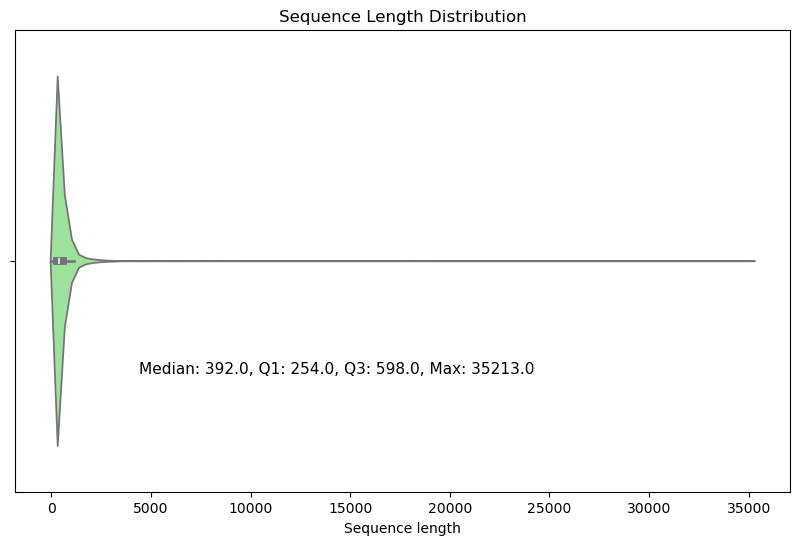

In [162]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=combined_ds["AA_length"], inner="box", color="lightgreen")
values = combined_ds["AA_length"]
minimum = np.min(values)
q1 = np.percentile(values, 25)
median = np.median(values)
q3 = np.percentile(values, 75)
maximum = np.max(values)


plt.xlabel("Sequence length")
plt.title("Sequence Length Distribution")
plt.text(x=(median+4000), y=(0.25),  # 0 = first (and only) box
         s=f"Median: {median:.1f}, Q1: {q1:.1f}, Q3: {q3:.1f}, Max: {maximum:.1f}",
         ha="left", va="bottom", fontsize=11, color="black")
plt.show()


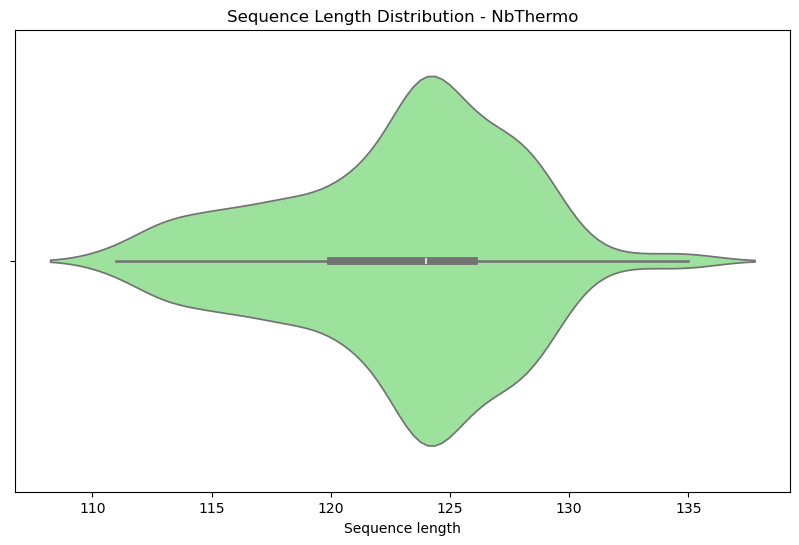

In [163]:
plt.figure(figsize=(10, 6))
df = combined_ds[combined_ds["From"] == "nano"]
sns.violinplot(x=df["AA_length"], inner="box", color="lightgreen")
values = df["AA_length"]
minimum = np.min(values)
q1 = np.percentile(values, 25)
median = np.median(values)
q3 = np.percentile(values, 75)
maximum = np.max(values)


plt.xlabel("Sequence length")
plt.title("Sequence Length Distribution - NbThermo")
# plt.text(x=(median+4000), y=(0.25),  # 0 = first (and only) box
#          s=f"Median: {median:.1f}, Q1: {q1:.1f}, Q3: {q3:.1f}, Max: {maximum:.1f}",
#          ha="left", va="bottom", fontsize=11, color="black")
plt.show()


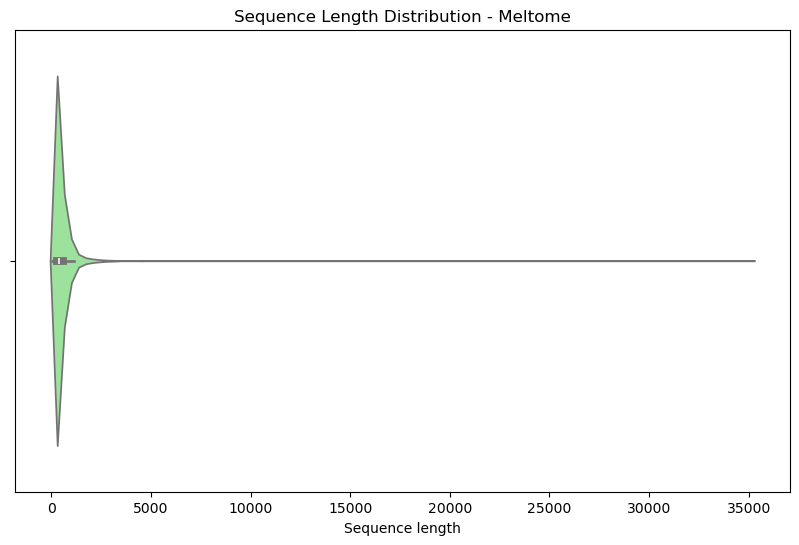

In [164]:
plt.figure(figsize=(10, 6))
df = combined_ds[combined_ds["From"] == "meltome"]
sns.violinplot(x=df["AA_length"], inner="box", color="lightgreen")
values = df["AA_length"]
minimum = np.min(values)
q1 = np.percentile(values, 25)
median = np.median(values)
q3 = np.percentile(values, 75)
maximum = np.max(values)


plt.xlabel("Sequence length")
plt.title("Sequence Length Distribution - Meltome")
# plt.text(x=(median+4000), y=(0.25),  # 0 = first (and only) box
#          s=f"Median: {median:.1f}, Q1: {q1:.1f}, Q3: {q3:.1f}, Max: {maximum:.1f}",
#          ha="left", va="bottom", fontsize=11, color="black")
plt.show()

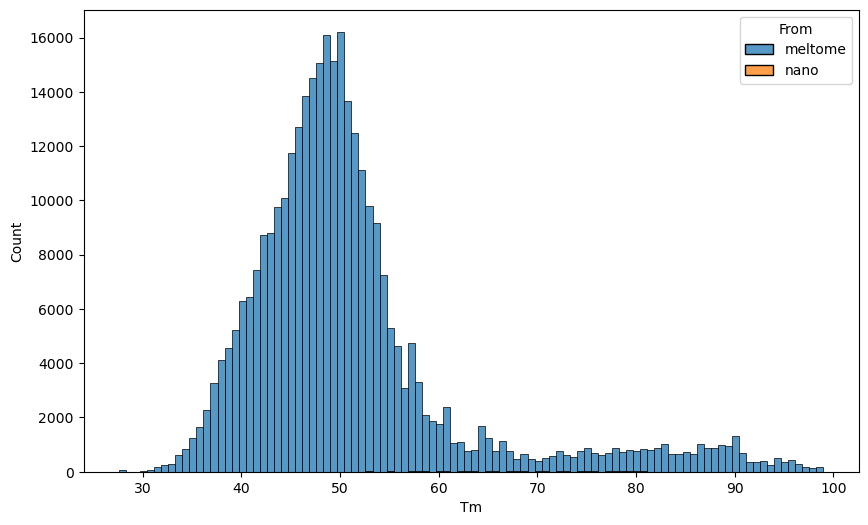

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(data = combined_ds, x = "Tm", hue = "From", multiple="stack", bins = 100)
plt.show()


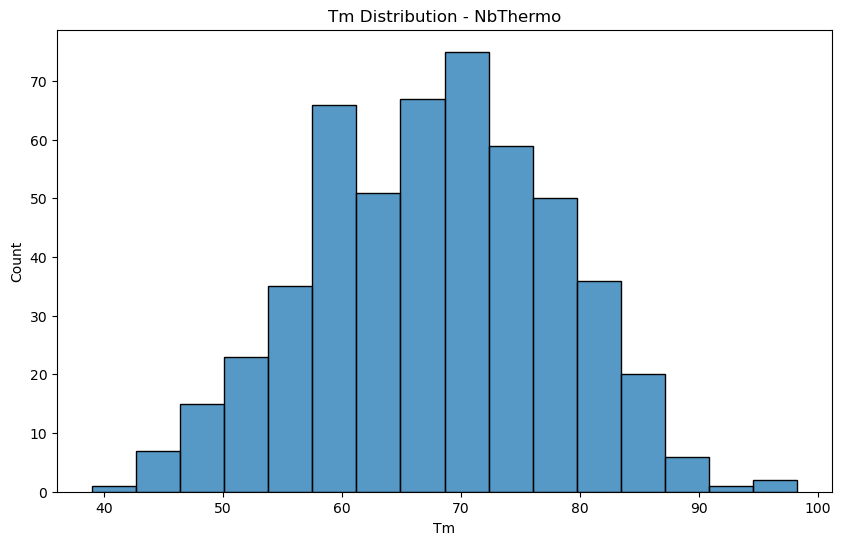

In [166]:
plt.figure(figsize=(10, 6))
df = combined_ds[combined_ds["From"] == "nano"]
sns.histplot(data = df, x = "Tm")
plt.title("Tm Distribution - NbThermo")
plt.show()


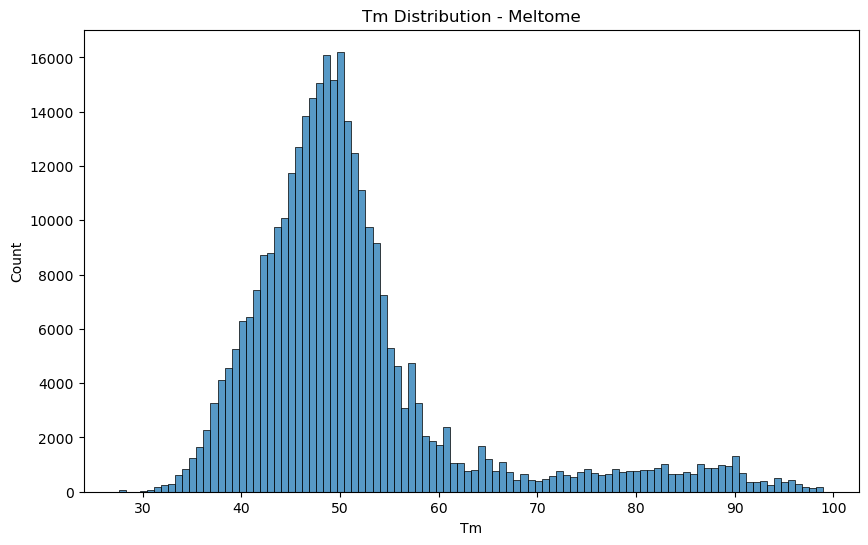

In [167]:
plt.figure(figsize=(10, 6))
df = combined_ds[combined_ds["From"] == "meltome"]
sns.histplot(data = df, x = "Tm", bins = 100)
plt.title("Tm Distribution - Meltome")
plt.show()

In [168]:
combined_ds = combined_ds[~combined_ds["Sequence"].str.contains("X")]
combined_ds

,Tm,Sequence,From,AA_length
0,56.693844,MQVLAKENIKLNQTVSSKEEAIKLAGQTLIDNGYVTEDYISKMFER...,meltome,143
1,43.373369,MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVM...,meltome,68
2,40.693719,MADYFLTVFDPSGNTLVNEQFEAEHEEAAKTHGEALLKEKELHSHT...,meltome,61
3,48.069618,MRPEEITEMIEQLRTGAINELRVQKEHFLDFRAVLSKQDDFKHFRG...,meltome,64
4,39.507236,MEEKYETNGYDTSIVYDYKEYPDVKYGRCDNCDYTLFKSSVKSGIF...,meltome,59
...,...,...,...,...
327499,58.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano,124
327500,60.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano,124
327501,71.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKELE...,nano,124
327502,71.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSDYAMGWFRQAPGKELE...,nano,124


In [169]:
def calculate_molecular_weight_biopython(protein_sequence):
    """Calculates the molecular weight of a protein sequence using Biopython."""
    analysed_seq = ProteinAnalysis(protein_sequence)
    return analysed_seq.molecular_weight()

combined_ds["MW"] = combined_ds["Sequence"].apply(calculate_molecular_weight_biopython)
combined_ds["MW"] = combined_ds["MW"]/1000
combined_ds

,Tm,Sequence,From,AA_length,MW
0,56.693844,MQVLAKENIKLNQTVSSKEEAIKLAGQTLIDNGYVTEDYISKMFER...,meltome,143,15.746502
1,43.373369,MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVM...,meltome,68,7.896295
2,40.693719,MADYFLTVFDPSGNTLVNEQFEAEHEEAAKTHGEALLKEKELHSHT...,meltome,61,6.942696
3,48.069618,MRPEEITEMIEQLRTGAINELRVQKEHFLDFRAVLSKQDDFKHFRG...,meltome,64,7.591515
4,39.507236,MEEKYETNGYDTSIVYDYKEYPDVKYGRCDNCDYTLFKSSVKSGIF...,meltome,59,7.027900
...,...,...,...,...,...
327499,58.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano,124,13.478655
327500,60.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano,124,13.563763
327501,71.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKELE...,nano,124,13.534761
327502,71.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSDYAMGWFRQAPGKELE...,nano,124,13.592797


Text(0.5, 1.0, 'Molecular Weight Distribution of Dataset')

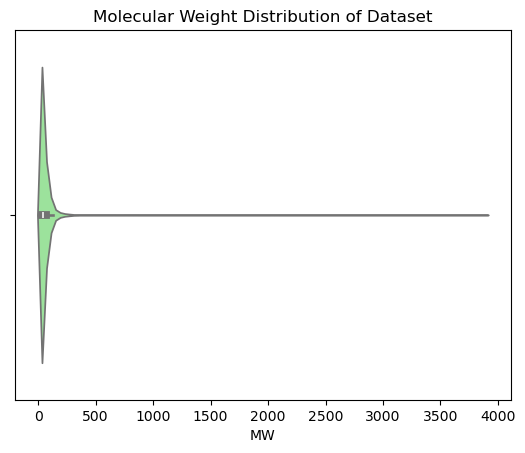

In [170]:
sns.violinplot(x=combined_ds["MW"], inner="box", color="lightgreen")
plt.title("Molecular Weight Distribution of Dataset")

In [171]:
filtered_df = combined_ds[(combined_ds["MW"] <= 30) & (combined_ds["MW"] >= 10)]
filtered_df

,Tm,Sequence,From,AA_length,MW
0,56.693844,MQVLAKENIKLNQTVSSKEEAIKLAGQTLIDNGYVTEDYISKMFER...,meltome,143,15.746502
6,41.180214,MAGLIRVTPEELRAMAKQYGVESQEVLNQVDRLNRMISDLKSMWEG...,meltome,97,10.993174
16,50.340766,MAVQQYGVLKGIVLDMKRETDDDSPHFQVKMLGEENTYYRCAINVM...,meltome,225,25.554160
18,46.847985,MIKVQTKWLERAQRIRAIAQAGLAFSKDVYDRERYEELMKLSAEMM...,meltome,208,23.942907
19,42.190230,MYIFQADQLSAKDTYKLLSGTVIPRPIAFVTTLSSGGAVNAAPFSF...,meltome,205,22.584160
...,...,...,...,...,...
327499,58.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano,124,13.478655
327500,60.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKERE...,nano,124,13.563763
327501,71.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSGYAMGWFRQAPGKELE...,nano,124,13.534761
327502,71.000000,QVQLVESGGGLVQAGDSLRLSCAASGRTFSDYAMGWFRQAPGKELE...,nano,124,13.592797


Text(0.5, 1.0, 'Molecular Weight Distribution of Filtered Dataset')

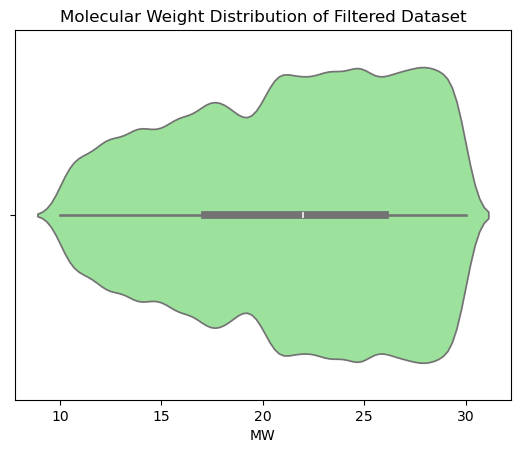

In [172]:
sns.violinplot(x=filtered_df["MW"], inner="box", color="lightgreen")
plt.title("Molecular Weight Distribution of Filtered Dataset")

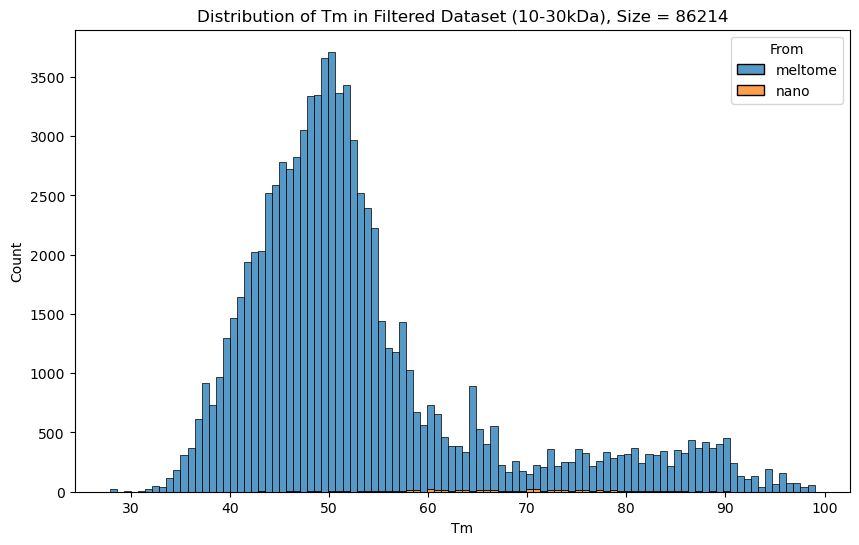

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(data = filtered_df, x = "Tm", hue = "From", multiple="stack", bins = 100)
plt.title(f'Distribution of Tm in Filtered Dataset (10-30kDa), Size = {filtered_df.shape[0]}')
plt.show()

## Stratification and Resampling

In [174]:
num_bins = 4  # You can adjust this
filtered_df["Tm_bin"] = pd.cut(filtered_df["Tm"], bins=num_bins)

min_group = filtered_df.groupby(["Tm_bin"]).size().min()
print(min_group)
stratified_df = (
    filtered_df
    .groupby(["Tm_bin"], group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), min_group), random_state=42))
)
stratified_df = stratified_df.drop(columns=["Tm_bin"])

5855


/var/folders/83/05d_l9fn2q3916cmlh6jsskw0000gq/T/ipykernel_34657/4186969526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Tm_bin"] = pd.cut(filtered_df["Tm"], bins=num_bins)
/var/folders/83/05d_l9fn2q3916cmlh6jsskw0000gq/T/ipykernel_34657/4186969526.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_group = filtered_df.groupby(["Tm_bin"]).size().min()
/var/folders/83/05d_l9fn2q3916cmlh6jsskw0000gq/T/ipykernel_34657/4186969526.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versi

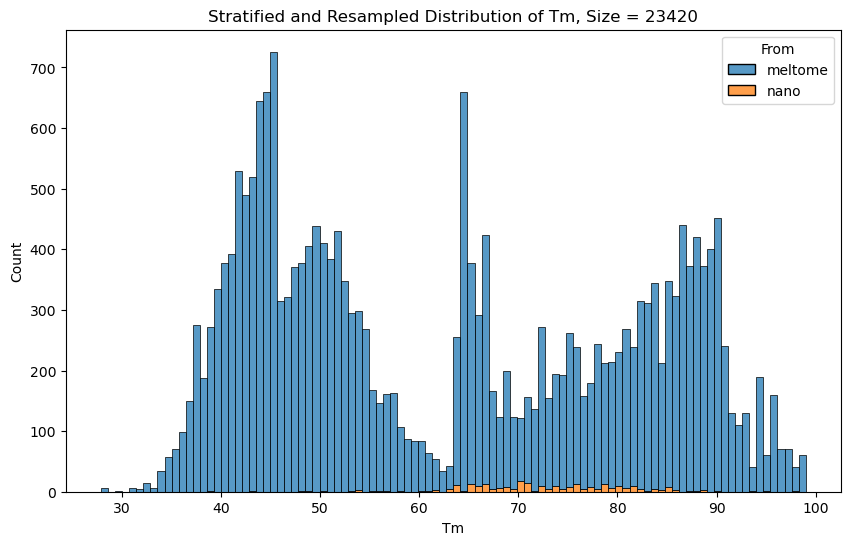

In [175]:
plt.figure(figsize=(10, 6))
sns.histplot(data = stratified_df, x = "Tm", hue = "From", multiple="stack", bins = 100)
plt.title(f'Stratified and Resampled Distribution of Tm, Size = {stratified_df.shape[0]}')
plt.show()

In [176]:
filtered_df.to_csv("Filtered_data.csv", index=False)
stratified_df.to_csv("Stratified_data.csv", index=False)